In [18]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist
X_train, y_train = X_train_full[:5000], y_train_full[:5000]
X_valid, y_valid = X_train_full[5000:], y_train_full[5000:]

X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

##### Creating the model

In [19]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

#Other way of creating the model
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28,28]),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(10, activation="softmax")
# ])

model.summary()
model.layers

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [20]:
# to findout the name of each layer
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1

True

In [21]:
# access weights and biases
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

##### Training and evaluating the model

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4698 - loss: 1.8061 - val_accuracy: 0.6622 - val_loss: 1.0686
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6829 - loss: 0.9578 - val_accuracy: 0.7227 - val_loss: 0.8413
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7363 - loss: 0.7750 - val_accuracy: 0.7464 - val_loss: 0.7530
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7656 - loss: 0.6876 - val_accuracy: 0.7635 - val_loss: 0.6998
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7843 - loss: 0.6309 - val_accuracy: 0.7722 - val_loss: 0.6660
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7972 - loss: 0.5898 - val_accuracy: 0.7782 - val_loss: 0.6406
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8105 - loss: 0.5583 - val_accuracy: 0.7843 - val_loss: 0.6188
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8182 - loss: 0.5330 - val_accu

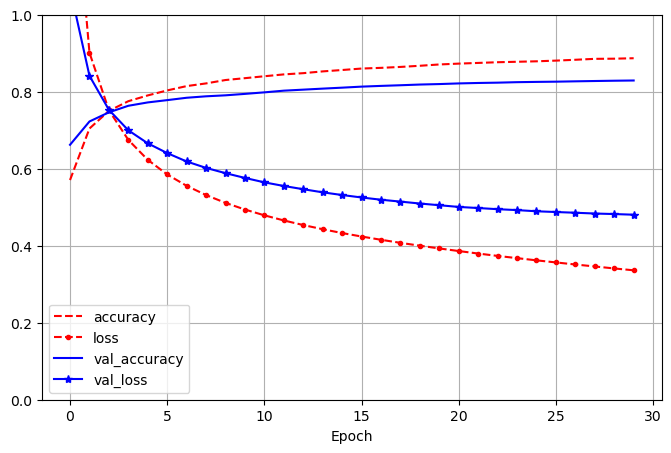

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5), ylim=(0,1), grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8257 - loss: 0.4993


[0.5048738718032837, 0.8184000253677368]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

y_new = y_test[:3]
y_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([9, 2, 1], dtype=uint8)

### Regresion MLP

In [31]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),                            
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1),
    ])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20


d:\Calculator\Programe\Anaconda-Python\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - RootMeanSquaredError: 3.6517 - loss: 13.6158 - val_RootMeanSquaredError: 2.9321 - val_loss: 8.5972
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - RootMeanSquaredError: 2.9099 - loss: 8.4689 - val_RootMeanSquaredError: 2.9123 - val_loss: 8.4813
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - RootMeanSquaredError: 2.8946 - loss: 8.3799 - val_RootMeanSquaredError: 2.9031 - val_loss: 8.4281
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - RootMeanSquaredError: 2.8865 - loss: 8.3329 - val_RootMeanSquaredError: 2.8973 - val_loss: 8.3946
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - RootMeanSquaredError: 2.8810 - loss: 8.3012 - val_RootMeanSquaredError: 2.8931 - val_loss: 8.3699
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - RootMeanSquaredError: 2.8767 - loss: 8.2769 - val_RootMeanSquaredError: 2.8898 - val_loss: 8.3511
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - RootMeanSquaredError: 2.8735 - loss: 

array([[[4.6478477],
        [4.6478477],
        [4.6478477],
        [4.6478477],
        [4.6478477],
        [4.6478477],
        [4.6478477],
        [4.6646104],
        [4.6929755],
        [4.3900056],
        [4.6338086],
        [4.5450263],
        [4.597075 ],
        [4.7146144],
        [4.448353 ],
        [4.620488 ],
        [4.460962 ],
        [4.4916162],
        [4.726321 ],
        [4.6886992],
        [4.849081 ],
        [4.6560955],
        [4.6478477],
        [4.6478477],
        [4.6478477],
        [4.6478477],
        [4.6478477],
        [4.6478477]],

       [[4.5322766],
        [4.429449 ],
        [4.4935617],
        [4.489142 ],
        [4.620688 ],
        [4.6424537],
        [4.8356423],
        [4.823296 ],
        [4.710191 ],
        [4.689265 ],
        [4.6054235],
        [4.6610827],
        [4.391945 ],
        [4.456576 ],
        [4.4053473],
        [4.3775682],
        [4.365462 ],
        [4.396548 ],
        [4.374701 ],
        [4.

##### Using TensoBoard for Visualization 

In [ ]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs")
    return Path(root_logdir) / strftime("run_%Y_%m_%d-%H_%M_%S")

run_logdir = get_run_logdir()

SyntaxError: expected ':' (1410439821.py, line 4)